In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import plotly.express as px

# Load data from Excel file
file_path = '/content/CancerFactorsData.xlsx'
df = pd.read_excel(file_path)

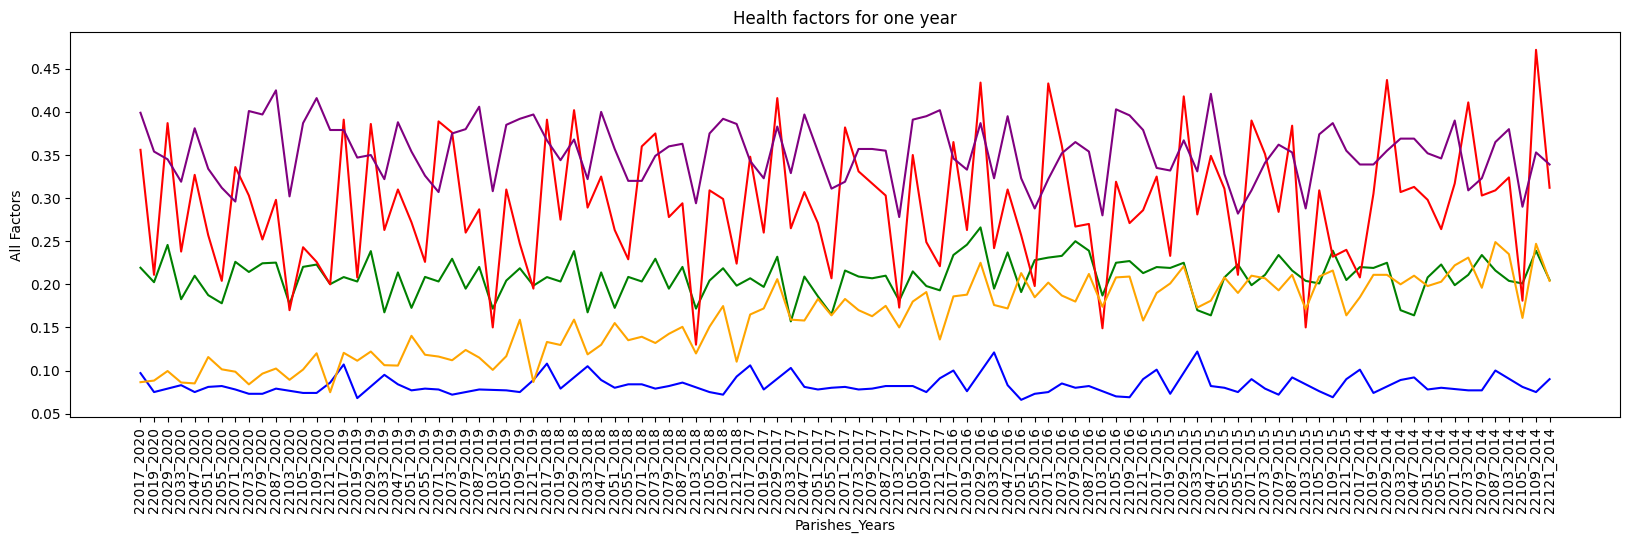

In [ ]:
#Plots all the health factors
plt.figure(figsize=(20,5))
plt.plot(df["ID"], df["PM2.5"], color='blue')
plt.plot(df["ID"], df["Smoking"], color='green')
plt.plot(df["ID"], df["Poverty"], color='red')
plt.plot(df["ID"], df["Obesity"], color='purple')
plt.plot(df["ID"], df["Uninsured"], color='orange')
plt.xlabel('Parishes_Years')
plt.xticks(rotation='vertical')
plt.ylabel('All Factors')
plt.title('Health factors for one year')
plt.show()

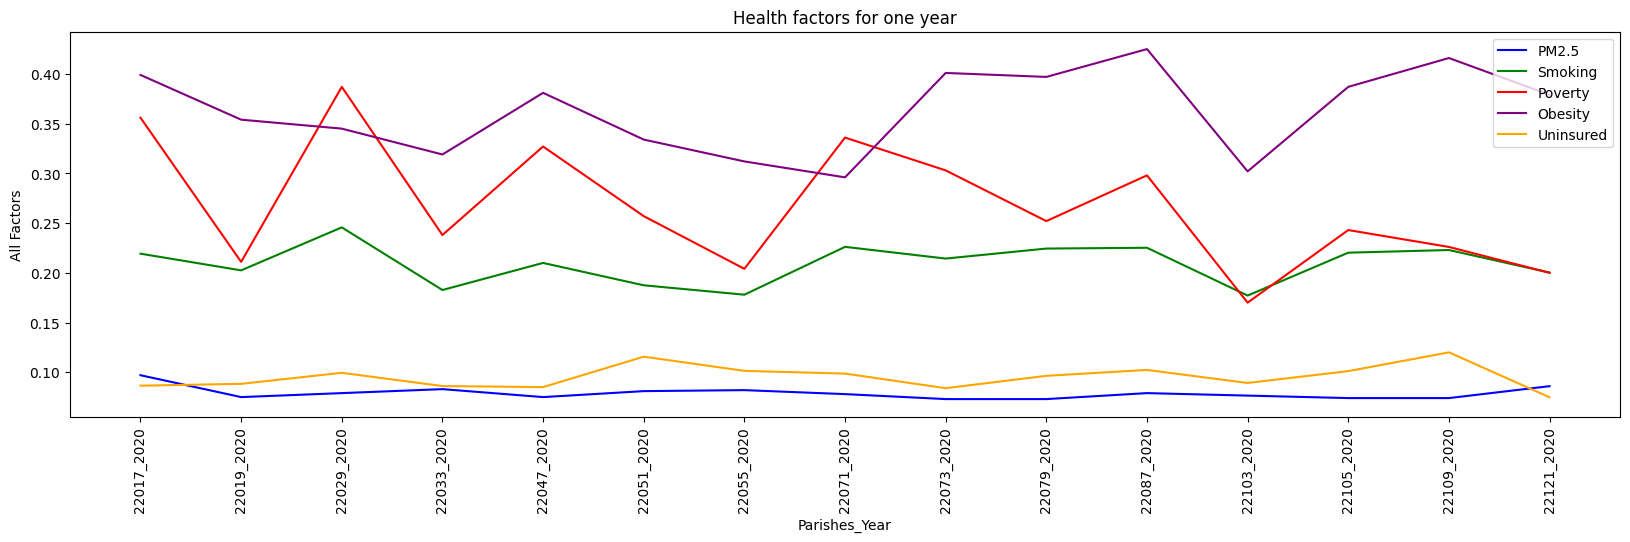

In [ ]:
#Plots all the health factors based on one year
df_filtered = df[df['ID'].astype(str).str.endswith('2020')]
plt.figure(figsize=(20, 5))

# Plotting selected rows
plt.plot(df_filtered["ID"], df_filtered["PM2.5"], color='blue', label='PM2.5')
plt.plot(df_filtered["ID"], df_filtered["Smoking"], color='green', label='Smoking')
plt.plot(df_filtered["ID"], df_filtered["Poverty"], color='red', label='Poverty')
plt.plot(df_filtered["ID"], df_filtered["Obesity"], color='purple', label='Obesity')
plt.plot(df_filtered["ID"], df_filtered["Uninsured"], color='orange', label='Uninsured')

plt.xlabel('Parishes_Year')
plt.xticks(rotation='vertical')
plt.ylabel('All Factors')
plt.title('Health factors for one year')
plt.legend()
plt.show()

In [ ]:
# Mutlivariate Regression
# Define your input features and target variable
features = ['Smoking', 'Obesity', 'Poverty', 'Uninsured', 'PM2.5']
target = 'LungCancerRates'

# Split the data into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating Sequential model
model = Sequential()

# Adding Dense layers to create a deep neural network
model.add(Dense(64, input_shape=(len(features),), activation='relu'))  # Input layer with 64 neurons and ReLU activation
model.add(Dense(32, activation='relu'))  # Hidden layer with 32 neurons and ReLU activation
model.add(Dense(1))  # Output layer with 1 neuron (for regression task)

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])  # Using Adam optimizer and Mean Squared Error loss

# Training the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)

# Evaluating the model
loss, mae = model.evaluate(X_test, y_test)

# Making predictions
predictions = model.predict(X_test)

# Printing sample predicted and actual values for comparison
for i in range(5):
    print(f"Predicted: {predictions[i][0]}, Actual: {y_test.iloc[i]}")

1/1 [==============================] - 0s 101ms/step
Predicted: 0.7842105627059937, Actual: 0.851483927
Predicted: 0.7398312091827393, Actual: 0.874412004
Predicted: 0.8187766075134277, Actual: 0.851970181
Predicted: 0.7725936770439148, Actual: 0.705521669
Predicted: 0.76854008436203, Actual: 0.87335535


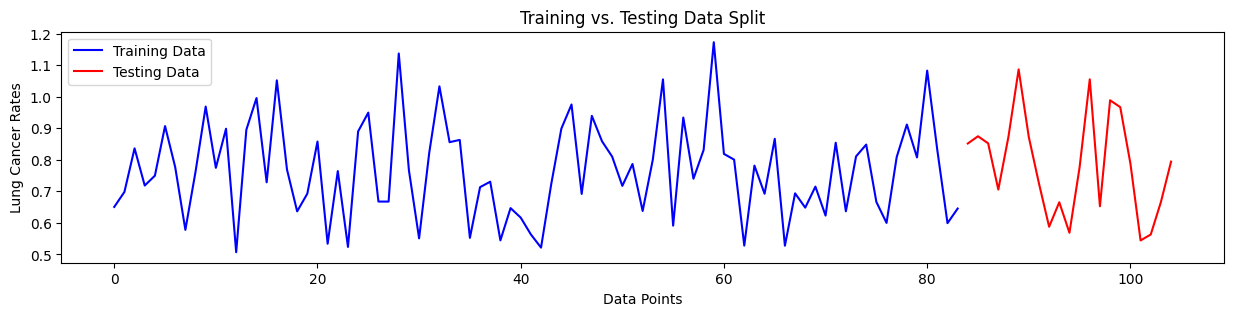

In [ ]:
import matplotlib.pyplot as plt

# Generate indices for training and testing data points
train_indices = range(len(X_train))
test_indices = range(len(X_train), len(X_train) + len(X_test))

plt.figure(figsize=(15, 3))

# Plot training data as a line
plt.plot(train_indices, y_train, label='Training Data', color='blue')

# Plot testing data as a line
plt.plot(test_indices, y_test, label='Testing Data', color='red')

plt.xlabel('Data Points')
plt.ylabel('Lung Cancer Rates')
plt.title('Training vs. Testing Data Split')
plt.legend()
plt.show()

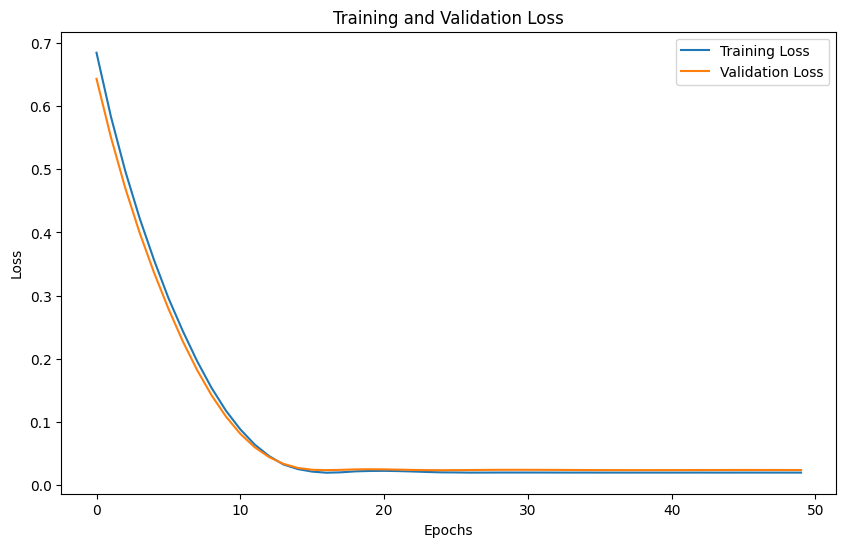

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

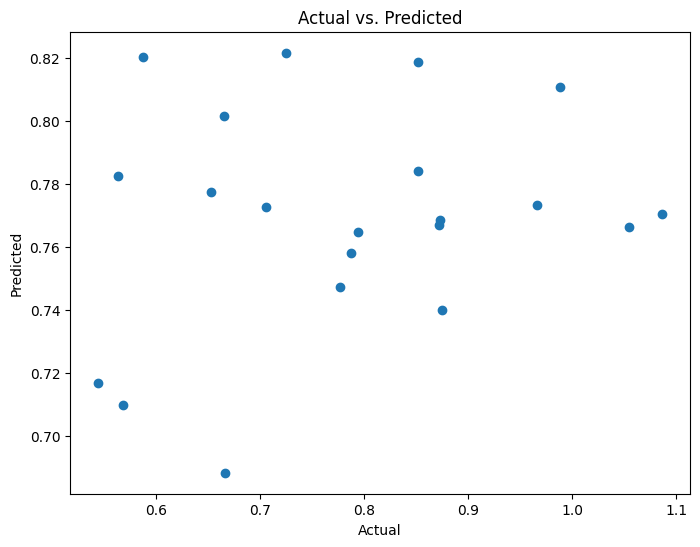

In [ ]:
#Create a plot to visualize predictions vs. actuals
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()